In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numba import njit, jit, prange

import fun

In [15]:
L = 1620
nn_mat = fun.return_nn(L)
beta = (1.)/2.26918531421

generate_initial_conf = False

if generate_initial_conf:
    lattice = np.random.choice([-1,1], size = L**2).reshape(L,L)
    lattice = lattice.astype(np.int8)

    lattice = fun.wolff_wrapper(lattice, nn_mat, beta, Nsteps = int(1e6))
    np.save('data/IsingCritConf.npy', lattice)

else:
    lattice = np.load('data/IsingCritConf.npy')

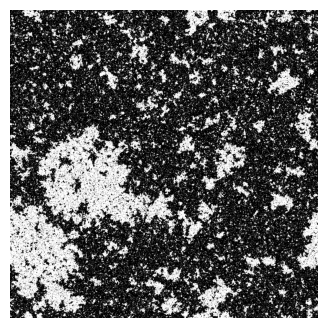

In [16]:
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.imshow(lattice, cmap = plt.get_cmap('binary'))
ax.axis('off')
plt.show()

In [11]:
equilibrium_conf = fun.generate_configurations(lattice, nn_mat, beta, nconf = 10, Nsteps = 55)

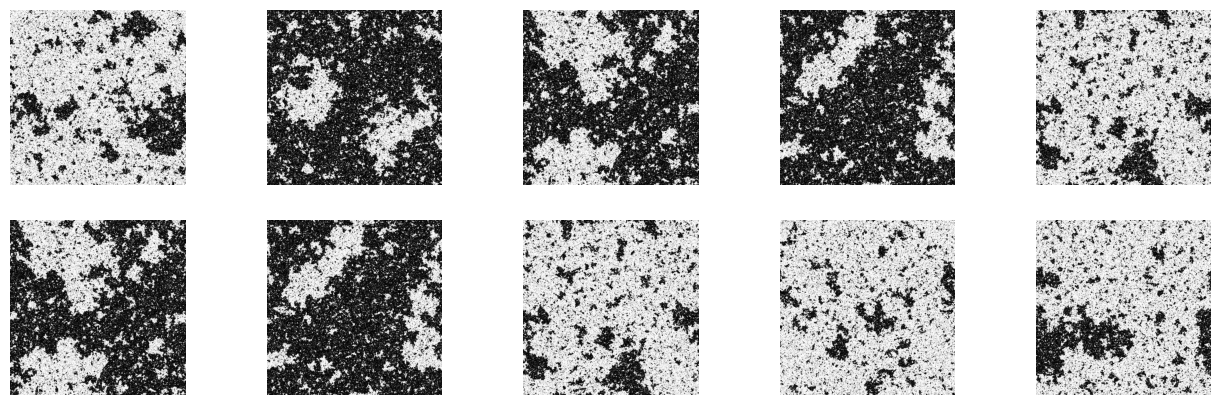

In [12]:
fig, ax = plt.subplots(2, 5, figsize = (16,5))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(equilibrium_conf[i*2+j], cmap = plt.get_cmap('binary'))
        ax[i,j].axis('off')
plt.show()